## Method 1: Short and sweet method using TextBlob

TextBlob library provides with many NLP functions including pre-trained sentiment polarity probability. [Source](https://github.com/llSourcell/twitter_sentiment_challenge/blob/master/demo.py)

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fullTweets = pd.read_csv('./OutputStreaming.txt', sep=",", header = None)
fullTweets.columns = ['author', 'date', 'text']

In [3]:
print(type(fullTweets))
fullTweets.drop([0,1], inplace=True)
fullTweets.reset_index(drop=True, inplace=True)
print(fullTweets.shape)
fullTweets.head(4)

<class 'pandas.core.frame.DataFrame'>
(18929, 3)


,author,date,text
0,_Lucas_Chinag,2017-07-26 02:37:04,@joao_caleffi Jaozin no tesla #euacredito
1,ElectricMotorsC,2017-07-26 02:37:06,Seems that @Volkswagen creates a big rival for...
2,HernanIturriaga,2017-07-26 02:37:06,Volkswagen confía en que sus eléctricos supera...
3,GourmetHipster,2017-07-26 02:37:34,"@clairlemon Many see capitalism = greed, but g..."


In [4]:
df = pd.DataFrame(columns=['author','date','text','polarity','subjectivity'])
df[['author','date','text']]=fullTweets.copy()
print(df.shape)
df.head(6)

(18929, 5)


,author,date,text,polarity,subjectivity
0,_Lucas_Chinag,2017-07-26 02:37:04,@joao_caleffi Jaozin no tesla #euacredito,NaN,NaN
1,ElectricMotorsC,2017-07-26 02:37:06,Seems that @Volkswagen creates a big rival for...,NaN,NaN
2,HernanIturriaga,2017-07-26 02:37:06,Volkswagen confía en que sus eléctricos supera...,NaN,NaN
3,GourmetHipster,2017-07-26 02:37:34,"@clairlemon Many see capitalism = greed, but g...",NaN,NaN
4,DrJamalAlzanki,2017-07-26 02:37:41,RT @qunaibet: قيمة شركة TESLA للسيارات الكهربا...,NaN,NaN
5,ScarletCoral,2017-07-26 02:37:43,Oui! Une Tesla pour tous! :) https://t.co/xjW7...,NaN,NaN


In [1]:
# split off urls using regular expressions
import re

urlsL=[]
textsL=[]
for index, row in df.iterrows():
    texti=row.text  # text_i
    url=re.findall(r'http\S+', texti)
    #print('\n',len(url),row.author, row.text[0:20])
    urlsL+=[url]    
    for urlj in url: #Some tweets contain several urls
        textisurl=texti.replace(urlj,'') #text_i sans url
    #print('TEXT:',text1)
        textsL+=[textisurl]  # add it to the list
print('lengths should match:',len(urlsL), len(textsL), len(df.text))
#df.text = textsL  # replace the 'text' column in df
#df['urls']=urlsL  # add a 'urls' column to df
df.head(5)

NameError: name 'df' is not defined

### Let's make a word cloud of our tweets

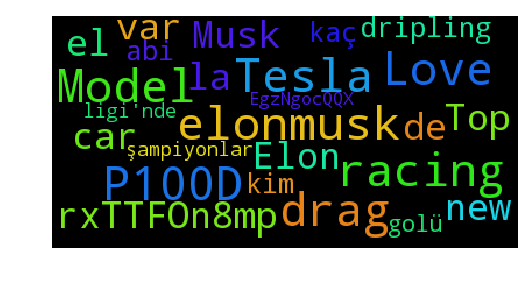

In [12]:
# Make a word cloud
# will need to install wordCloud: conda install -c conda-forge wordcloud

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS) # This is a pre-packaged set of stop words.
stopwords.update(['https','t.co','co','video','RT']) #add other words as needed

myString = str(" ".join(df['text'])) # should be one string

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=25,
                          max_font_size=40, 
                          random_state=7
                         ).generate(myString)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


In [10]:
import tweepy
from textblob import TextBlob

# Try everything with just first ten rows
for index, row in df.iterrows():
    #print(row.text[0:20])
    
    # Perform Sentiment Analysis on Tweets
    analysis = TextBlob(row.text)
    
    row.polarity, row.subjectivity = round(analysis.sentiment[0], 3), round(analysis.sentiment[1], 3)
    #print(row.polarity, row.subjectivity, row.author,row.text[0:30])
df.head(5)

,author,date,text,polarity,subjectivity
0,_Lucas_Chinag,2017-07-26 02:37:04,@joao_caleffi Jaozin no tesla #euacredito,0,0
1,ElectricMotorsC,2017-07-26 02:37:06,Seems that @Volkswagen creates a big rival for...,0,0.1
2,HernanIturriaga,2017-07-26 02:37:06,Volkswagen confía en que sus eléctricos supera...,0,0
3,GourmetHipster,2017-07-26 02:37:34,"@clairlemon Many see capitalism = greed, but g...",0.45,0.65
4,DrJamalAlzanki,2017-07-26 02:37:41,RT @qunaibet: قيمة شركة TESLA للسيارات الكهربا...,0,0


### Scatterplot using Plotly
You can group your groups by their sentiment and subjectivity scores, tweet length, and time posted. If you want to perform K-means clustering on them, here's a [nice tutorial](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/) from pythonprogramming.net.

In [11]:
# Will need to install plotly: conda install plotly
import plotly.offline as py
import plotly.tools as tls
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print( __version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)

2.0.9


In [21]:
# Use this simple plot to check that plotly.offline is working
# Remove the hatch before 'iplot' to create the plot
# A graph should appear below
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])


NameError: name 'tls' is not defined

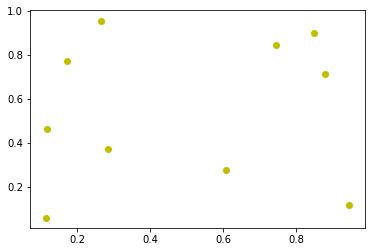

In [7]:
colors = ['b', 'c', 'y', 'm', 'r']

# You can subset your datapoints by different criteria and then assign them to a separate group
lo = plt.scatter(df.loc[0:40,'polarity'], df.loc[0:40,'subjectivity'], marker='x', color=colors[0])
ll = plt.scatter(df.loc[40:,'polarity'], df.loc[40:,'subjectivity'], marker='o', color=colors[1])
# l  = plt.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[1])
a  = plt.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[2])
# h  = plt.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[3])
# hh = plt.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[4])
# ho = plt.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[4])

#text = iter(['Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'])
text = iter(['lo', 'll'])

mpl_fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( mpl_fig )

for dat in plotly_fig['data']:
    t = next(text)
    dat.update({'name': t, 'text':t})

plotly_fig['layout']['showlegend'] = True
iplot(plotly_fig)

## Perform sentiment analysis using [MonkeyLearn](https://monkeylearn.com/)  

The method above can easily be adapted to use MonkeyLearn instead of TextBlob.
You could compare how the two perform.
[source](https://sidmouthwebdesign.github.io/josephmacmillan/twitter-sentiment-analysis-with-monkeylearn-and-tweepy/)

[MonkeyLearn Free Account](https://monkeylearn.com/pricing/)

In [ ]:
from monkeylearn import MonkeyLearn

for index, row in df.iterrows():
    print(row.text)
    
    #Perform Sentiment Analysis on Tweets
    ml = MonkeyLearn('d7edbb0981db8698ce6b85094844f067c8b42d60')
    text_list = [row.text]
    module_id = 'cl_qkjxv9Ly'
    res = ml.classifiers.classify(module_id, text_list, sandbox=True)
    print(res.result)
    print("")

@joao_caleffi Jaozin no tesla #euacredito
[[{'category_id': 329045, 'probability': 0.808, 'label': 'negative'}]]

Seems that @Volkswagen creates a big rival for #Tesla #Model3 https://t.co/DoGeahQBYk @VW #vw #electriccars… https://t.co/vA32Wiv3RE
[[{'category_id': 411994, 'probability': 0.496, 'label': 'neutral'}]]

Volkswagen confía en que sus eléctricos superarán a los de Tesla https://t.co/dtJ0zDms4H
[[{'category_id': 411994, 'probability': 0.592, 'label': 'neutral'}]]

@clairlemon Many see capitalism = greed, but greed is detrimental to a free market economy, it perverts it. Car dea… https://t.co/ipldOYPtDM
[[{'category_id': 411994, 'probability': 0.386, 'label': 'neutral'}]]

RT @qunaibet: قيمة شركة TESLA للسيارات الكهربائية التي أنتجت ٨٥٠٠٠ سيارة، أكبر من قيمة شركة جي إم GM التي انتجت ٩ ملايين سيارة !!… 
[[{'category_id': 411994, 'probability': 0.685, 'label': 'neutral'}]]

Oui! Une Tesla pour tous! :) https://t.co/xjW7N1d7Mp
[[{'category_id': 329046, 'probability': 0.827, 'label

# Method 2: SentiWordnet

Using SentiWordnet
One of the most straightforward approaches is to use SentiWordnet to compute the polarity of the words and average that value. The plan is to use this model as a baseline for future approaches. It’s also a good idea to know about SentiWordnet and how to use it. [Source](http://nlpforhackers.io/sentiment-analysis-intro/)

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

lemmatizer = WordNetLemmatizer()
 
 
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [19]:
def clean_text(text):
    text = text.replace("<br />", " ")
    #text = text.decode(encoding = 'UTF-8')
 
    return text

In [20]:
 
def swn_polarity(text):
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
 
    sentiment = 0.0
    tokens_count = 0
 
    text = clean_text(text)
 
 
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
 
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
 
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0
 
    # sum greater than 0 => positive sentiment
    if sentiment >= 0:
        return 1
 
    # negative sentiment
    return 0
# Since we're shuffling, you'll get different results
print(swn_polarity(train_X[0]), train_y[0]) 
print(swn_polarity(train_X[1]), train_y[1]) 
print(swn_polarity(train_X[2]), train_y[2]) 
print(swn_polarity(train_X[3]), train_y[3]) 
print(swn_polarity(train_X[4]), train_y[4]) 

NameError: name 'train_X' is not defined

## Method 3: NLTK SentimentAnalyzer  

NLTK has some neat built in utilities for doing sentiment analysis. Here's sample code "SentimentAnalyzer" from nlpfor hackers. It trains a NaiveBayes Classifier model on a labeled dataset of 25,000 movie reviews.
[Source](http://nlpforhackers.io/sentiment-analysis-intro/)

## Read and split train and test sets

In [21]:
#import pandas as pd 
ntotal=3000
data = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3, nrows=ntotal)       
#data = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
# 25000 movie reviews
print(data.shape) # (25000, 3) 
print(data["review"][0][:89])         # Check out the review
print(data["sentiment"][0])          # Check out the sentiment (0/1)

FileNotFoundError: File b'labeledTrainData.tsv' does not exist

In [ ]:
len(data["review"])

The sentiment in this corpus is 0 for negative and 1 for positive. 

First, we shuffle the data and split it for training and testing.

In [ ]:
import random as rd
sentiment_data = list(zip(data["review"], data["sentiment"]))
len(sentiment_data)
rd.shuffle(sentiment_data)
# 80% for training
ntrain=int(ntotal*4/5)
print(ntrain)
train_X, train_y = zip(*sentiment_data[:ntrain])
# Keep 20% for testing
test_X, test_y = zip(*sentiment_data[ntrain:])

## Train and test model (Method 3)

In [ ]:
from unidecode import unidecode
from nltk import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import extract_unigram_feats, mark_negation
 
 
# mark_negation appends a "_NEG" to words after a negation until a punctuation mark.
# this means that the same after a negation will be handled differently 
# than the word that's not after a negation by the classifier
print(mark_negation("I like the movie .".split()))        # ['I', 'like', 'the', 'movie.']
print(mark_negation("I don't like the movie .".split()))  # ['I', "don't", 'like_NEG', 'the_NEG', 'movie._NEG']

In [ ]:
# The nltk classifier won't be able to handle the whole training set
TRAINING_COUNT = ntrain
 
analyzer = SentimentAnalyzer()
vocabulary = analyzer.all_words([mark_negation(word_tokenize(unidecode(clean_text(instance)))) 
                                 for instance in train_X[:TRAINING_COUNT]])
print("Vocabulary: ", len(vocabulary)) # 1356908
 
print("Computing Unigram Features ...")
unigram_features = analyzer.unigram_word_feats(vocabulary, min_freq=10)
print("Unigram Features: ", len(unigram_features)) # 8237
 
analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_features)
 
# Build the training set
_train_X = analyzer.apply_features([mark_negation(word_tokenize(unidecode(clean_text(instance)))) 
                                    for instance in train_X[:TRAINING_COUNT]], labeled=False)
 
# Build the test set
_test_X = analyzer.apply_features([mark_negation(word_tokenize(unidecode(clean_text(instance)))) 
                                   for instance in test_X], labeled=False)

In [ ]:
trainer = NaiveBayesClassifier.train
classifier = analyzer.train(trainer, zip(_train_X, train_y[:TRAINING_COUNT]))

In [ ]:
score = analyzer.evaluate(zip(_test_X, test_y))
print("Accuracy: ", score['Accuracy']) # 0.8064 for TRAINING_COUNT=5000

You should obtain a 0.8064 accuracy using this method (using only the first 5000 training samples).

# Method 4: NLTK SklearnClassifier
[Source](https://pythonprogramming.net/new-data-set-training-nltk-tutorial/)

Warning: This model may take several hours to train.

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

from nltk.tokenize import word_tokenize


class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
        
short_pos = open("short_reviews/positive.txt","r").read()
short_neg = open("short_reviews/negative.txt","r").read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# positive data example:      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

##
### negative data example:      
##training_set = featuresets[100:]
##testing_set =  featuresets[:100]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

##SVC_classifier = SklearnClassifier(SVC())
##SVC_classifier.train(training_set)
##print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


voted_classifier = VoteClassifier(
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

In [ ]:
analytics vidya india ion nation 
analyt csv dhya nd a on nat on